## Timing of (truncated) contagion maps

In [13]:
%load_ext autoreload
%autoreload 2

import cmap as conmap
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; 
sns.set_theme()
import pandas as pd

# For pretty colourmaps
import palettable
from matplotlib.colors import ListedColormap

sns.set_style("white")

import time


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Timing the calculations

In [14]:
N_vec = 10**np.arange(1.5,4,0.25)
N_vec = N_vec.astype(int)

t=0.3

truncatedMapTime = []
fullMapTime = []

# time the execution of the maps
for N in N_vec:
    print(N)
    # network construction
    noisyRL = conmap.constructNoisyRingLattice(numberNodes=N,geometricDegree=6,nongeometricDegree=2)
    print('network constructed')
    # time the trunctated map
    start = time.time()
    contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,numberSteps=20,symmetric=True)
    end = time.time()
    truncatedMapTime.append(end-start)

    # time the fill map
    start = time.time()
    contagionMap = conmap.runTruncatedContagionMap(noisyRL,threshold=t,symmetric=True)
    end = time.time()
    fullMapTime.append(end-start)

31
failed adding of non-geometric edges: restart
network constructed
56
failed adding of non-geometric edges: restart
network constructed
100
failed adding of non-geometric edges: restart
network constructed
177
network constructed
316
network constructed
562
network constructed
1000
network constructed
1778
network constructed
3162
network constructed
5623
network constructed


In [15]:
# fit powerlaw to data
from scipy.optimize import curve_fit

def func_powerlaw(_offsetx, m, c, c0):
    return c0 + x**m * c

def func_powerlaw(x, m, c):
    return (x**m) * c

fittedValues_fullmap, pcov = curve_fit(func_powerlaw, N_vec, fullMapTime, maxfev=2000 )
fittedValues_truncatedmap, pcov = curve_fit(func_powerlaw, N_vec, truncatedMapTime, maxfev=2000 )





## Plotting

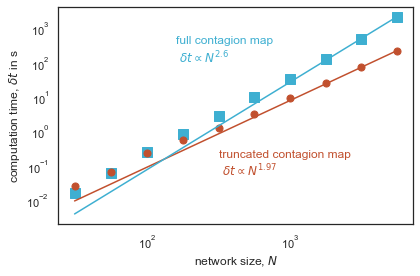

In [16]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(N_vec,fullMapTime,color='#3eafd1',s=100,marker='s')
plt.scatter(N_vec,truncatedMapTime,color='#c1502e',s=50,marker='o')

ax.set_yscale('log')
ax.set_xscale('log')

# add fit lines
plt.plot(N_vec, func_powerlaw(N_vec, fittedValues_truncatedmap[0], fittedValues_truncatedmap[1]), '-',color='#c1502e')
plt.plot(N_vec, func_powerlaw(N_vec, fittedValues_fullmap[0], fittedValues_fullmap[1]), '-',color='#3eafd1')
plt.xlabel('network size, $N$')
plt.ylabel('computation time, $\delta t$ in s')

# add labels
plt.text(10**2.2,10**2,'full contagion map\n $\delta t \propto N^{2.6}$',color='#3eafd1')
plt.text(10**2.5,0.05,'truncated contagion map\n $\delta t \propto N^{1.97}$',color='#c1502e')
plt.tight_layout()

plt.savefig('./figures/Fig7-computationalComplexityTruncatedContagion.pdf')

